<a href="https://colab.research.google.com/github/alubillijyaneswarrao-creator/MachineLearningModels/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import statistics as stats
from pathlib import Path

In [4]:
df=pd.read_csv('BostonHousing.csv')
print(df.head())
print(df.info())



      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float6

In [5]:
x=df.iloc[:,0:13]
y=df['medv']
print(x)
print(y)

        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3  

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt # Also needed for plotting


             crim        zn     indus      chas       nox        rm       age  \
crim     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
zn      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
indus    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
chas    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
nox      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
rm      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
age      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
dis     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
rad      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
tax      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
ptratio  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
b       -0.385064  0.175520 

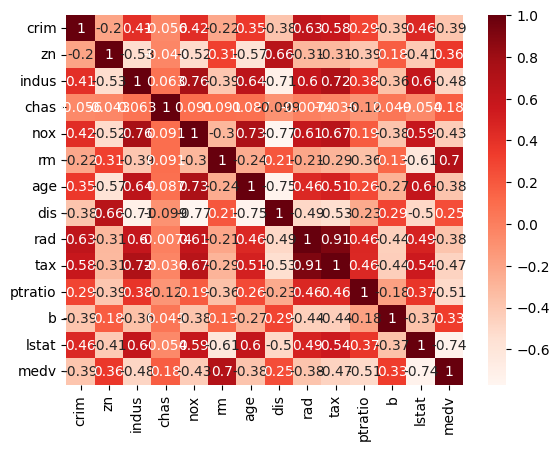

In [7]:
cor = df.corr()
print(cor)

# Use a valid colormap
sns.heatmap(cor, annot=True, cmap="Reds")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


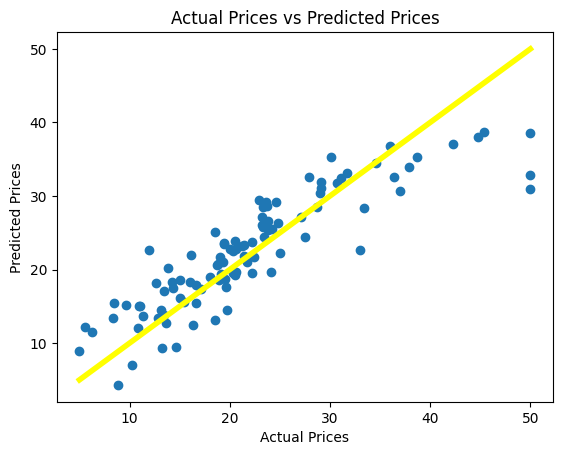

[13.379494   14.46205707 17.32339187 15.22020183 20.76901417 25.3936859
 15.4244764  13.71645518 15.58108464 34.50550425 22.79090263 12.19514113
 21.77313582 14.99797507 28.446288   23.87014785  7.0601656  18.61794409
 18.13444761 25.49800376 17.91847135 14.46906477 36.73304172 19.6357351
 16.19019797 13.88385912 24.43818314 31.03064623 21.70696142 22.68874251
 18.27587753 12.49823723 12.03826199 38.06701831 32.50401157 33.09829339
 35.27769534 23.55432181 32.62215699 15.39829363 27.21086761 29.45851577
 20.61669519 20.27097678 23.46144089 21.98283866 17.06463616 19.41744522
 30.93108078 22.60222857 37.12861718 19.64138196 20.99132577 18.33190781
 32.6523759   4.31354505 26.60467171 17.68626452 15.07194205 22.49855561
 30.61503267 28.38506517 17.50066176 28.69951124 19.60568393 11.5069226
 24.40740741 13.38118589  8.8870415  23.13961701 12.70544084 19.47796344
 26.04167073  9.48546158  9.35252717 21.88117265 35.31290661 19.22611472
 38.66480989 33.9165829  23.68010377 18.93331971 38.61

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=3001)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model=lm.fit(x_train,y_train)
y_pred = lm.predict(x_test)
plt.scatter(y_test,y_pred)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],color='yellow',linewidth=4)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()
print(y_pred)

In [9]:
  #Evaluation Matrices
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import numpy as np

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)
print('Mean Absolute Error:',mae)
print('Mean Squared Error:',mse)
print('Root Mean Squared Error:',rmse)
print('R-squared:',r2)

Mean Absolute Error: 3.4891929187448323
Mean Squared Error: 21.935145914119737
Root Mean Squared Error: 4.683497188439397
R-squared: 0.7658698348117832


In [10]:
#Adjusted r -square
n = x_test.shape[0]
p = x_test.shape[1]

adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n-p-1))
print("Adjusted R2:",adjusted_r2)



Adjusted R2: 0.731282424045342


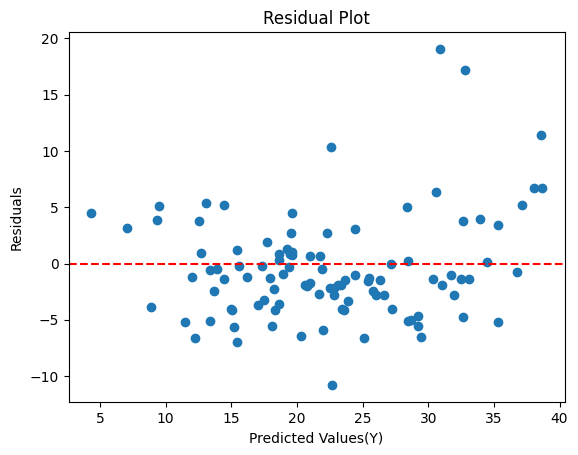

In [11]:
#REsidual Plot
residuals = y_test - y_pred
plt.scatter(y_pred,residuals)
plt.axhline(y=0,color='red',linestyle='--')
plt.xlabel('Predicted Values(Y)')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [12]:
import numpy as np
accuracy = 100 - np.mean(np.abs(y_test - y_pred) / y_test) * 100
print("Accuracy(%):",accuracy)

Accuracy(%): 80.48198628733039
